<a href="https://colab.research.google.com/github/lin3372/400_gan/blob/main/books/generative_deep_learning/0304_vae_digits_analysis_(iL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#setup

In [1]:
GOOGLE_COLAB=0
USE_GPU=0

## gpu

In [2]:
try:
  !nvidia-smi
except:
  print("couldn not communicate with the NVIDIA driver")

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  #raise SystemError('GPU device not found')
  print('GPU device not found, using CPU')
else:
  USE_GPU=1
  print('Found GPU at: {}'.format(device_name))


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

GPU device not found, using CPU


## mount google drive



In [3]:
import os, sys
if 'google.colab' in sys.modules:
  print("Running in Google Colab, mounting GDrive")
  from google.colab import drive
  drive.mount('/gdrive')
  GOOGLE_COLAB=1

  PROJ_DATA_DIR = "/gdrive/MyDrive/github/400_gan/books/generative_deep_learning/"
  os.makedirs(PROJ_DATA_DIR, exist_ok=True)


Running in Google Colab, mounting GDrive
Mounted at /gdrive


## working directory setting

1. With Colab this prog will clone from davidADSP/GDL_code.git and revised in lin3372/400_gan 
2. With local machine this prog will be running in the directory and the cloned repo will be in "./src/"

 directory
* The **data** folder is where to download relevant data sources (chapter 3 onwards)
* The **run** folder stores output from the generative models (chapter 3 onwards) 
* The **utils** folder stores useful functions that are sourced by the main notebooks

In [4]:
if (GOOGLE_COLAB==1): ## when executing from PC
  PROJ_WORKING_DIR = "/gdrive/MyDrive/github/400_gan/books/generative_deep_learning/src/"
else:  ## when executing from PC, assuming running from where the inpynb is located
  PROJ_WORKING_DIR = "./src/"

os.makedirs(PROJ_WORKING_DIR, exist_ok=True)  

## Clone/copy from Github/GDrive

In [5]:
import os
import shutil 
import sys 

!git config --global user.email "lin3372@gmail.com"
!git config --global user.name "lin3372"

if os.path.exists("./400_gan/") and os.path.isdir("./400_gan/"):
  shutil.rmtree("./400_gan/")
if os.path.exists("./src/") and os.path.isdir("./src/"):
  shutil.rmtree("./src/")

if (GOOGLE_COLAB==1):
  try:
    !git clone https://github.com/lin3372/400_gan 
    #!git clone https://github.com/davidADSP/GDL_code.git
  except:
    print("github.com/lin3372/400_gan  clone failed!")      
  else:
    print("github.com/lin3372/400_gan  cloned!")

  PROJ_GIT_SRC_PATH="./400_gan/books/generative_deep_learning/src/"
else: # running on PC
  PROJ_DAT_PATH="./src/"

shutil.copytree(PROJ_GIT_SRC_PATH, "./src")

os.chdir("./src/")

Cloning into '400_gan'...
remote: Enumerating objects: 4486, done.
remote: Counting objects: 100% (4486/4486), done.
remote: Compressing objects: 100% (445/445), done.
remote: Total 4486 (delta 4131), reused 4328 (delta 4033), pack-reused 0
Receiving objects: 100% (4486/4486), 166.59 MiB | 33.57 MiB/s, done.
Resolving deltas: 100% (4131/4131), done.
Checking out files: 100% (4276/4276), done.
github.com/lin3372/400_gan  cloned!


# VAE Analysis

## imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist, load_model

In [7]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = PROJ_WORKING_DIR + 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

## data

In [8]:
(x_train, y_train), (x_test, y_test) = load_mnist()

11501568/11490434 [==============================] - 0s 0us/step


## architecture

In [9]:
vae = load_model(VariationalAutoencoder, RUN_FOLDER)

## reconstructing original paintings

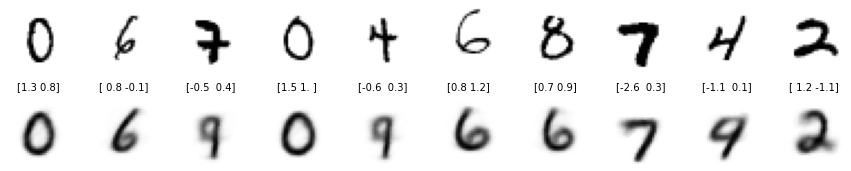

In [10]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')


## Mr N. Coder's wall

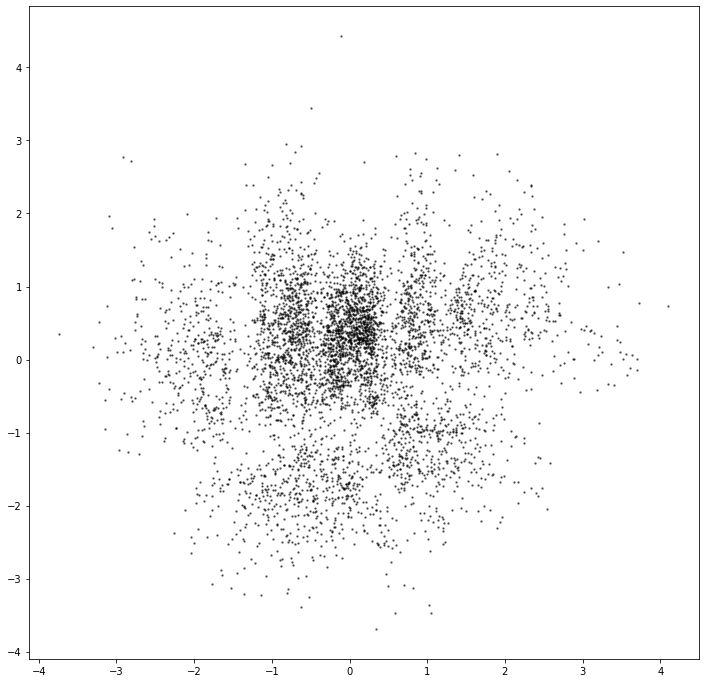

In [11]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

### The new generated art exhibition

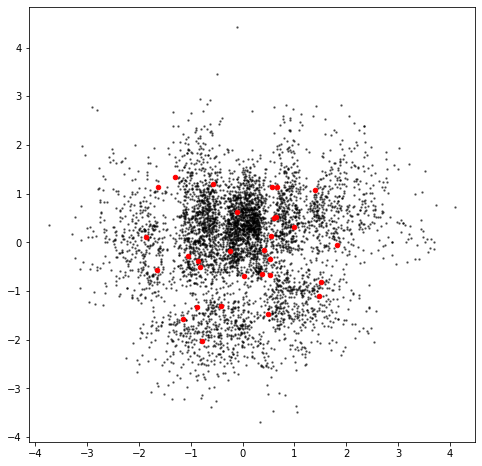

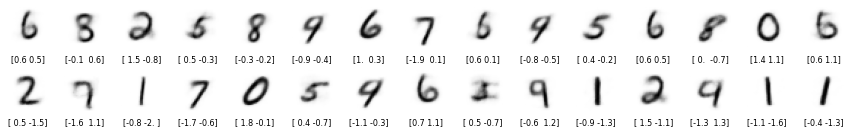

In [12]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

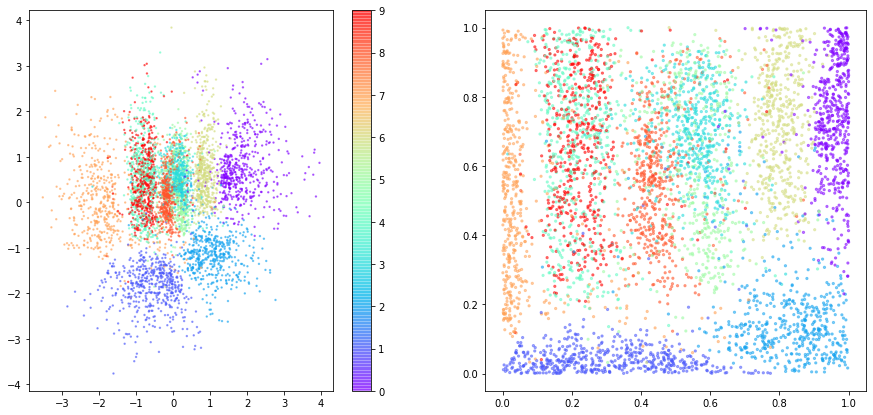

In [13]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=5)



plt.show()

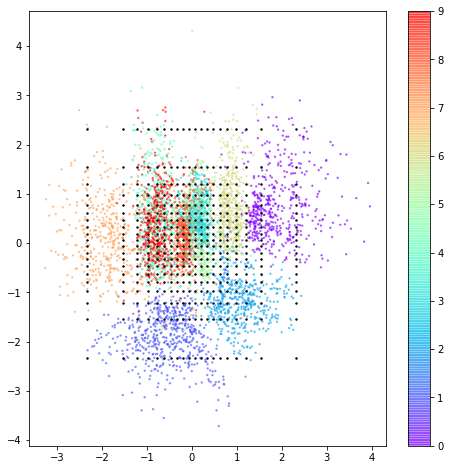

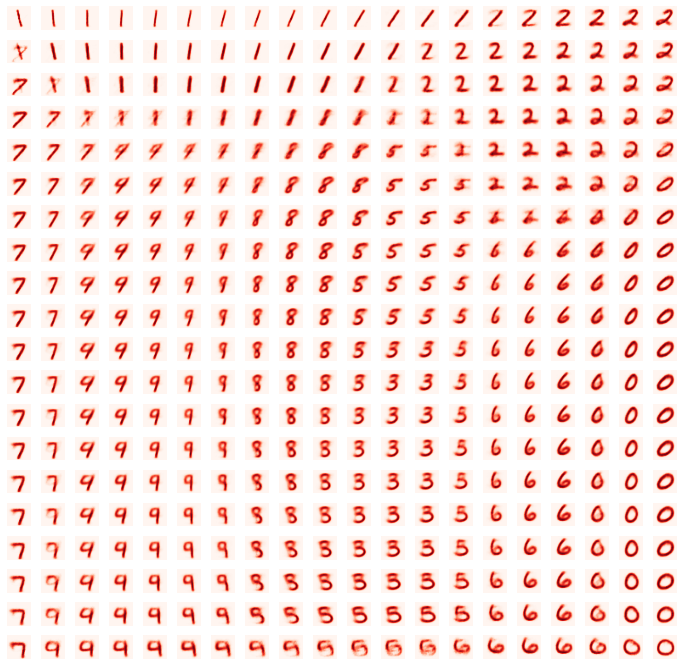

In [17]:
n_to_show = 5000
grid_size = 20
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(8, 8))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Reds')